In [22]:
# Standard code libraries
import numpy as np
from scipy.signal import find_peaks

import matplotlib.pyplot as plt

# Custom code libraries from the ReSurfEMG
from resurfemg.postprocessing.baseline import moving_baseline
import resurfemg.preprocessing.envelope as evl
import resurfemg.postprocessing.quality_assessment as qa

%matplotlib widget

In [39]:
# Define signal
fs_emg = 2048
t_emg = np.array([s_t/fs_emg for s_t in range(10*fs_emg)])
y_sin = np.cos((0.5* t_emg - 0.5)* 2 * np.pi)
y_sin[y_sin < 0] = 0
y_rand = np.random.normal(0, 1, size=len(y_sin))
y_rand_baseline = np.random.normal(0, 1, size=len(y_sin)) / 10
y_t = y_sin * y_rand + y_rand_baseline

# Get RMS signal
window_s = fs_emg // 5  # 200 ms --> Delay of 100 ms
y_env = evl.full_rolling_rms(y_t, window_s)


y_baseline = moving_baseline(y_env, 5*fs_emg, fs_emg//2)
peaks_source, _ = find_peaks(y_env, prominence=0.1)
peaks_env, _ = find_peaks(y_env, prominence=0.1)


median_snr = np.median(qa.snr_pseudo(y_env, peaks_env, y_baseline))

print('Median SNR: ' + str(median_snr))
np.round(median_snr) == 10.0

Median SNR: 10.087884332748406


True

Text(0, 0.5, 'Signal (uV)')

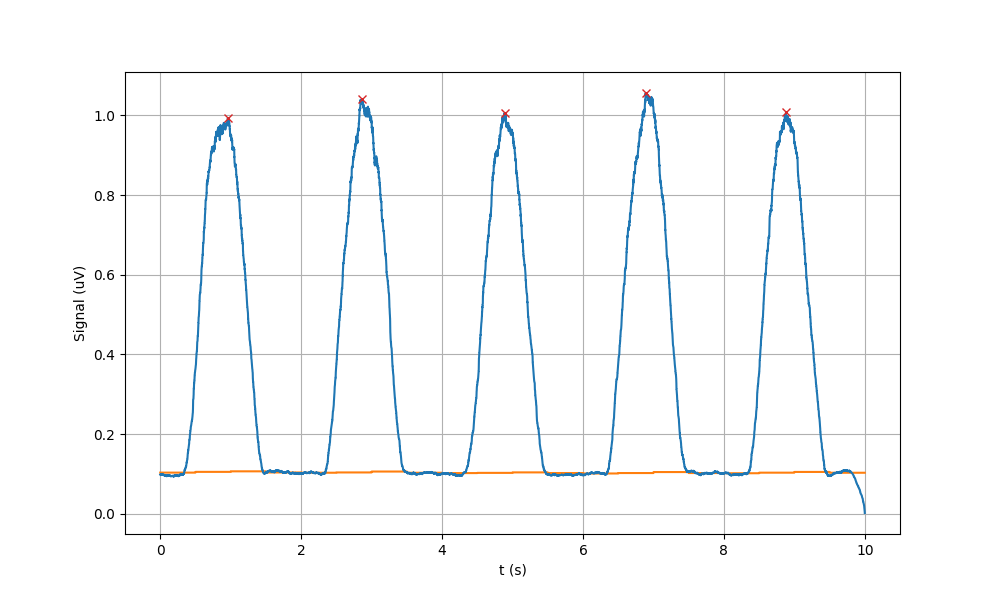

In [33]:
# Plot the raw data
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
axis.grid
axis.grid(True)
axis.plot(t_emg, y_baseline, color='tab:orange')
axis.plot(t_emg, y_env, color='tab:blue')
axis.plot(t_emg[peaks_source], y_env[peaks_source], 'x', color='tab:red')
axis.set_xlabel('t (s)')
axis.set_ylabel('Signal (uV)')